# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [3]:
# import libraries necesary for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   # We will use sci-kit learns implementation of K-means
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from IPython.display import display # Allows the use of display() for DataFrames
import vpython as vs

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
# load the dataset

df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:

# Features:

"""
Channel :  Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal)
Regions:  Lisnon, Oporto or Other (Nominal)
Fresh: annual spending (m.u.) on fresh products (Continuous)
Milk: annual spending (m.u.) on milk products (Continuous)
Grocery: annual spending (m.u.)on grocery products (Continuous)
Frozen: annual spending (m.u.)on frozen products (Continuous)
Detergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous)
Delicassen: annual spending (m.u.)on and delicatessen products (Continuous)
"""

'\nChannel :  Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal)\nRegions:  Lisnon, Oporto or Other (Nominal)\nFresh: annual spending (m.u.) on fresh products (Continuous)\nMilk: annual spending (m.u.) on milk products (Continuous)\nGrocery: annual spending (m.u.)on grocery products (Continuous)\nFrozen: annual spending (m.u.)on frozen products (Continuous)\nDetergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous)\nDelicassen: annual spending (m.u.)on and delicatessen products (Continuous)\n'

In [6]:
# data exploration

In [7]:
df.shape

(440, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
# check the min, max, mean, and std of the dataset

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
# check if there is missing value
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
# check the column value
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [12]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [13]:
df['Fresh'].value_counts()

Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: count, Length: 433, dtype: int64

In [14]:
# check how many zeros there are in each coloumn

(df['Fresh'] == 0).sum  
for column_name in df.columns:
    zero_count = (df[column_name] == 0).sum()
    print(f"Number of zeros in column '{column_name}': {zero_count}")

Number of zeros in column 'Channel': 0
Number of zeros in column 'Region': 0
Number of zeros in column 'Fresh': 0
Number of zeros in column 'Milk': 0
Number of zeros in column 'Grocery': 0
Number of zeros in column 'Frozen': 0
Number of zeros in column 'Detergents_Paper': 0
Number of zeros in column 'Delicassen': 0


In [15]:
# drop Channel and Region columns
df.drop(['Channel','Region'],axis = 1, inplace = True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


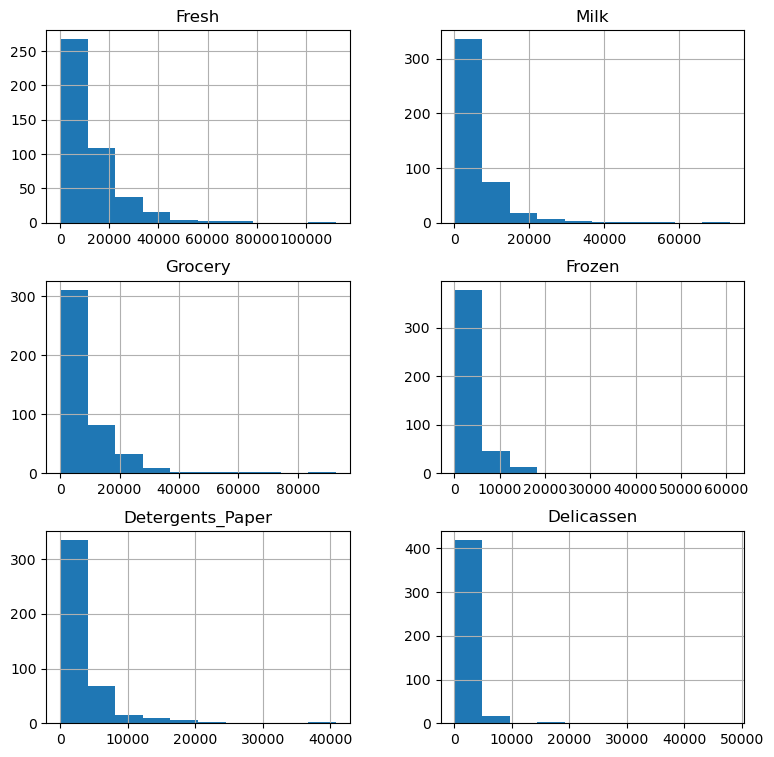

In [16]:
# plotting the distributions in wholesale dataset

p = df.hist(figsize = (9,9))

In [17]:
# examine the correlation of the dataset

df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


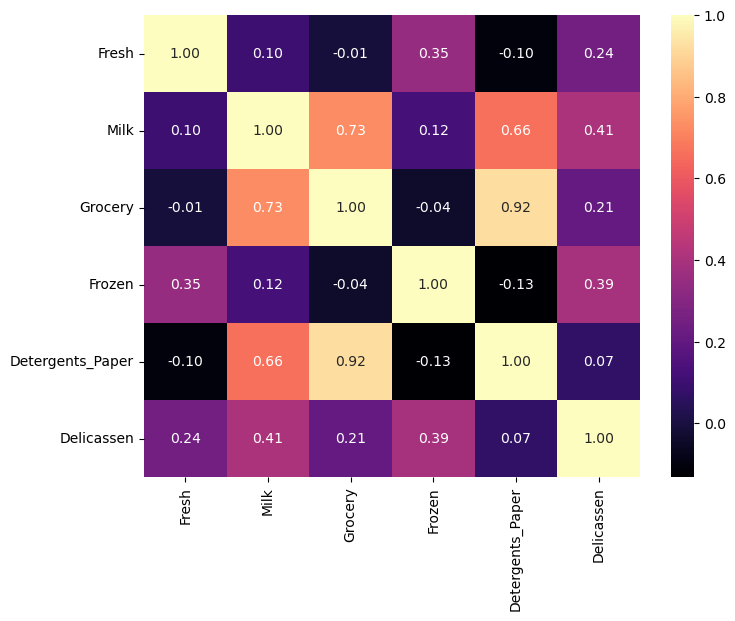

In [18]:
# correlation matrix graph of the dataset

f, ax = plt.subplots(figsize= [8,6])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
plt.show()

In [19]:
# From this correlation value and matrix, there are a few pairs of features that exhibit some degree of correlation. 
"""
correlation between Milk and  Grocery: 0.73
Correlation between Grocery and Detergents_Paper: 0.92
Correlation between Detergents_Paper and Milk: 0.66
"""

'\ncorrelation between Milk and  Grocery: 0.73\nCorrelation between Grocery and Detergents_Paper: 0.92\nCorrelation between Detergents_Paper and Milk: 0.66\n'

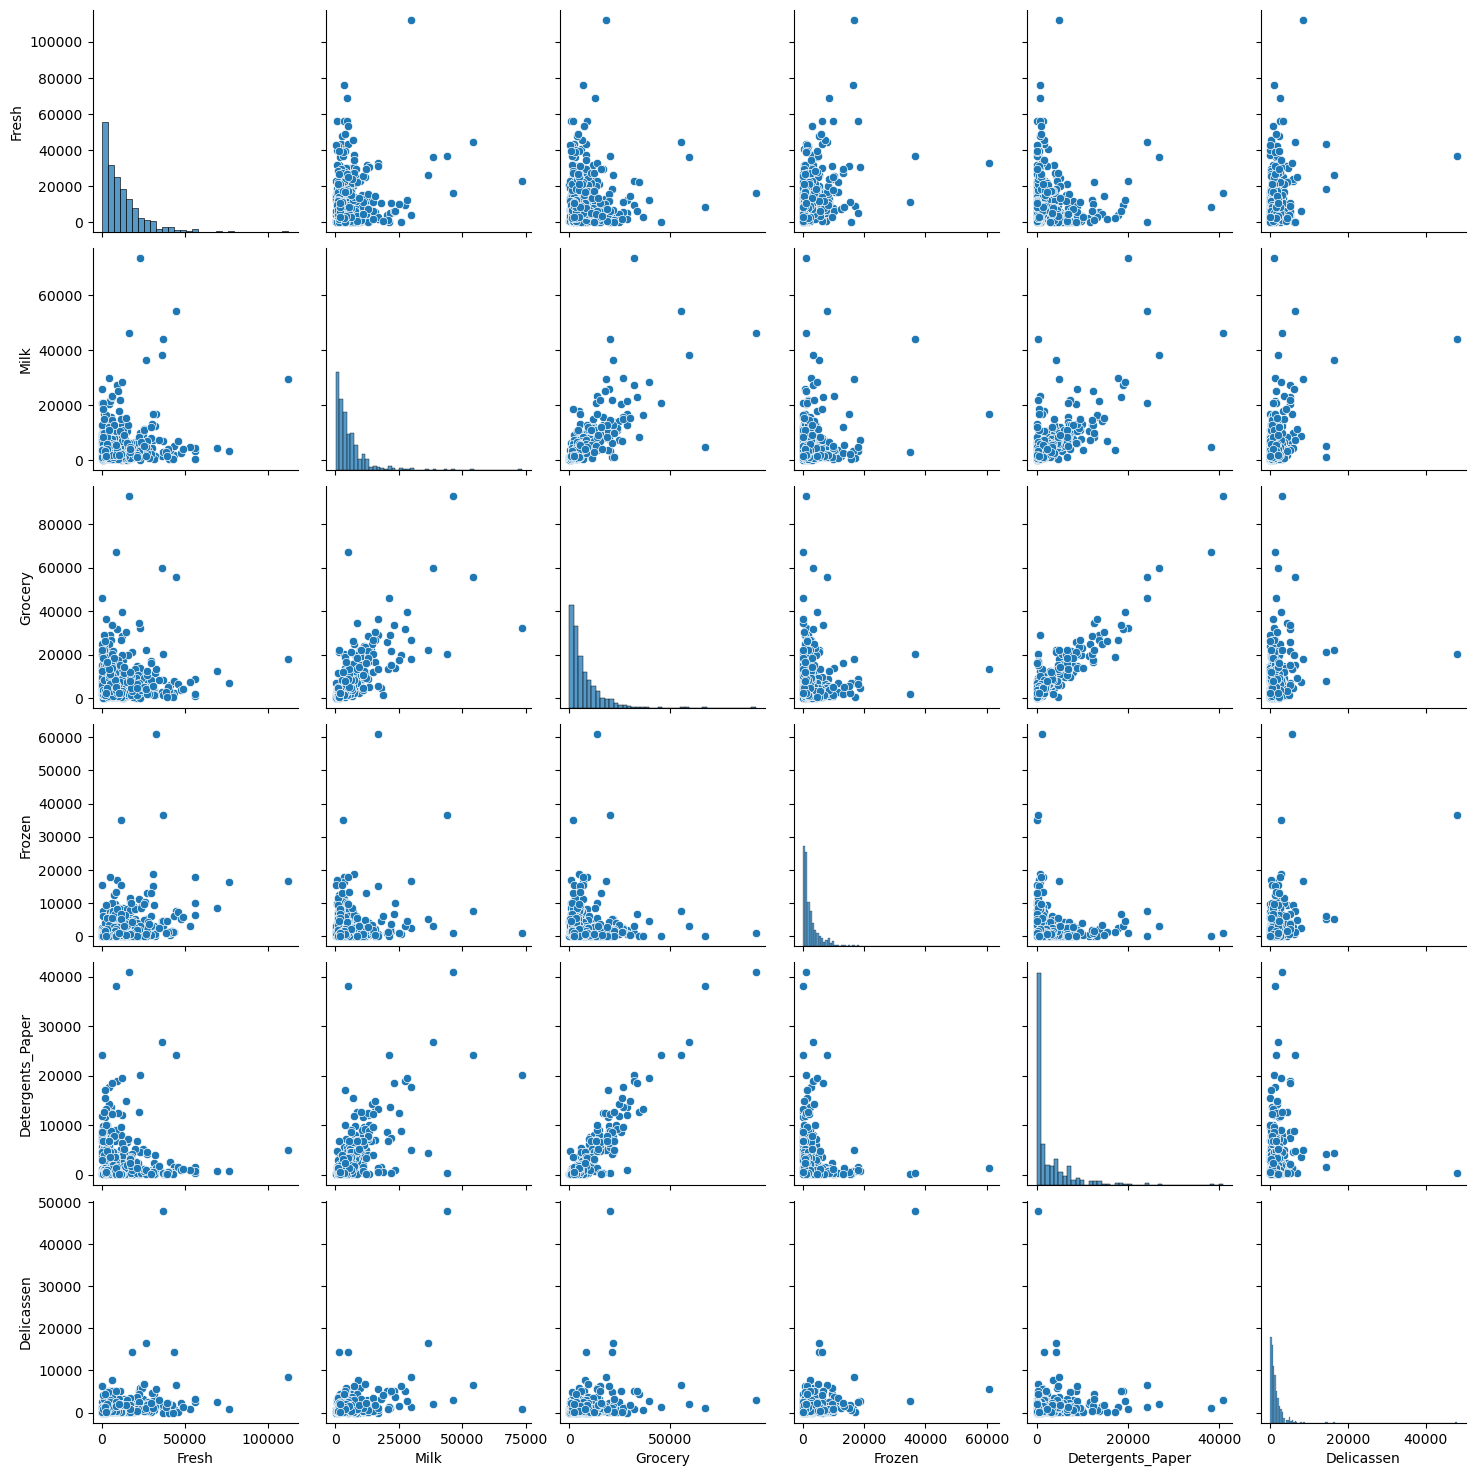

In [20]:
# Pairplot of all the feasures

sns.pairplot(data = df)
plt.show()

In [21]:
#The distribution of all the features appears to be similar. It is strongly right skewed.
#By the summary statistics, especially the mean, min and max value points, and the distribution above, we can expect there are someoutliers in each od the distributions.

In [162]:
df_copy = df
df_copy2 = df

In [116]:
# Scale the data using the natural logarithm
log_df = df.apply(lambda x: np.log(x))
log_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


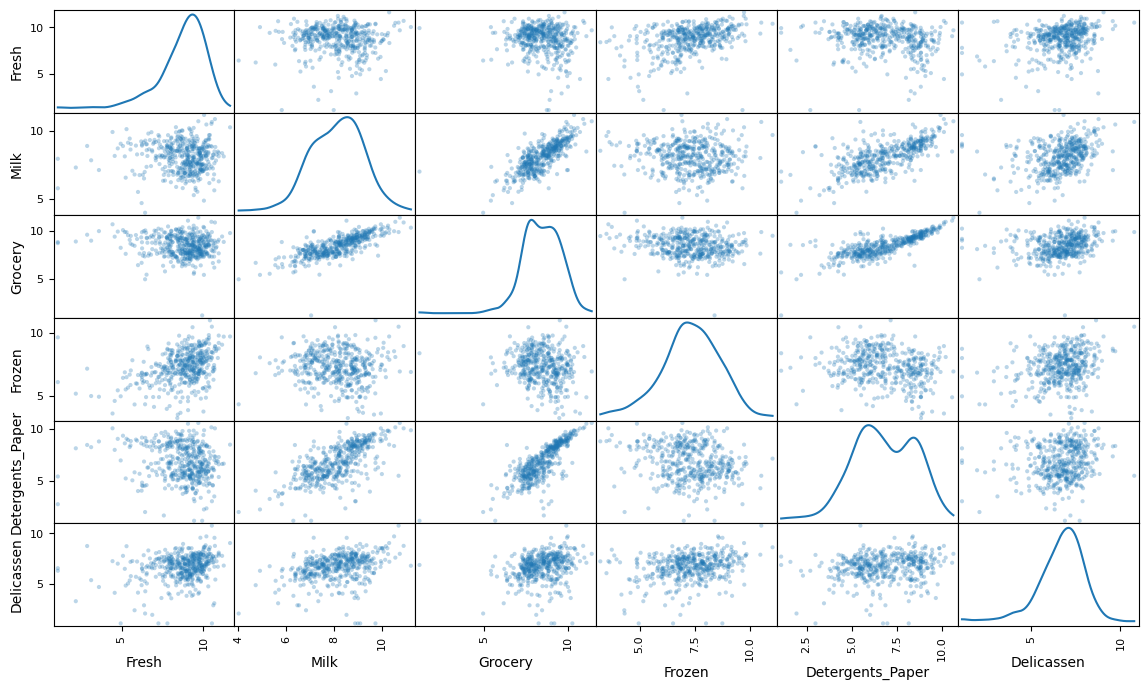

In [24]:
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_df, alpha=0.3, figsize=(14, 8), diagonal='kde')

# Display the plot
plt.show()

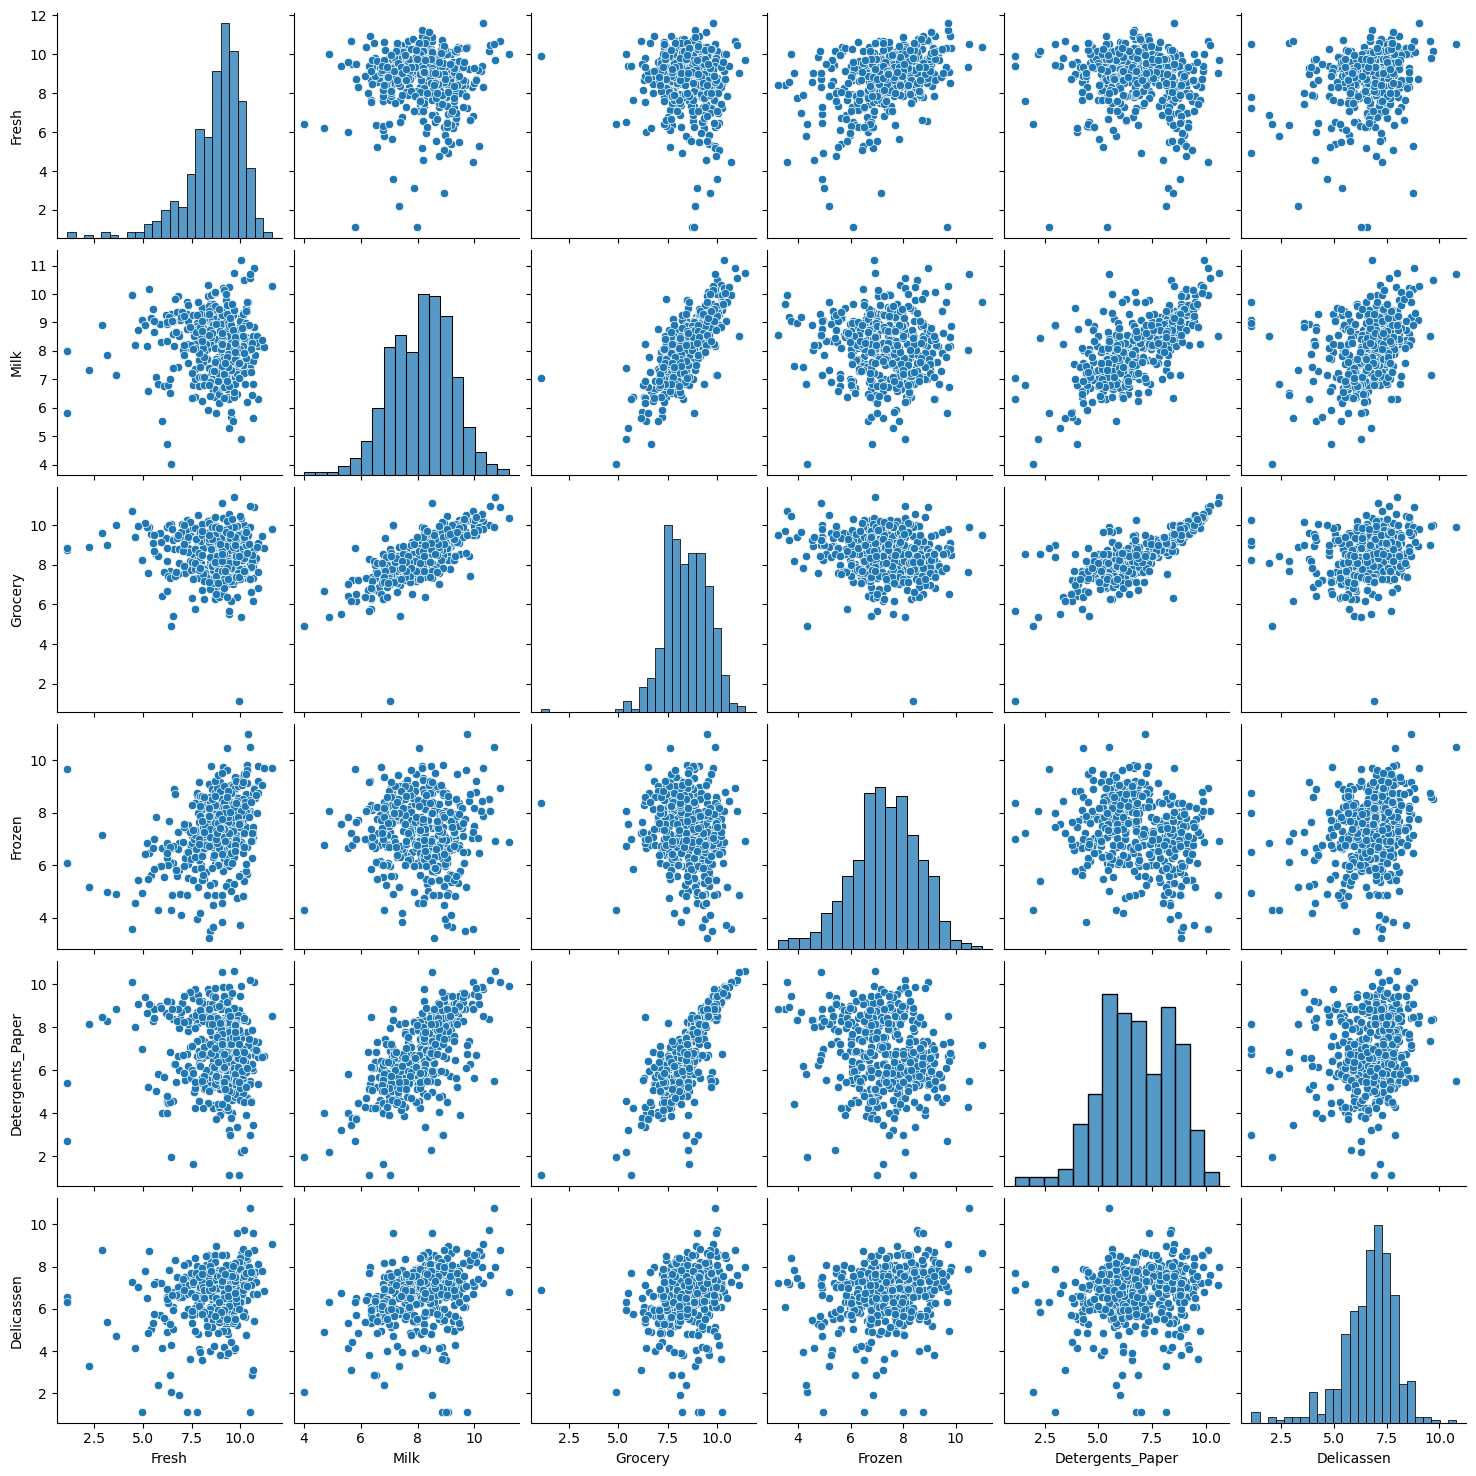

In [25]:
# Pairplot of all the feasures after using log function

sns.pairplot(data = log_df)
plt.show()

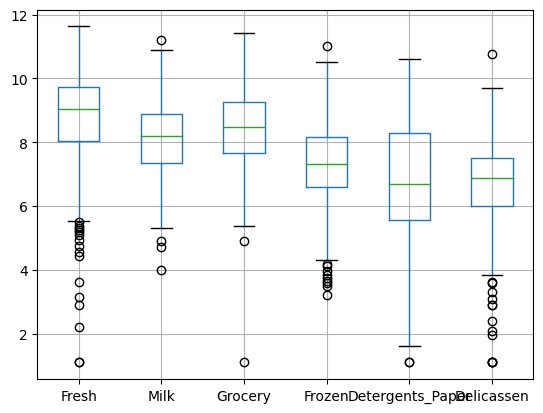

In [227]:
# boxplot of all the features

log_df.boxplot()
plt.show()

In [186]:
# Identify the outliers

outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_df.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_df[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_df[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print( "Data points considered outliers for the feature '{}':".format(feature))
    out = log_df[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    

#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print( "Outliers: {}".format(outliers))

# Remove the outliers, if any were specified 

log_df1 = log_df.drop(log_df.index[outliers]).reset_index(drop = True)
print("The good dataset now has {} observations after removing outliers.".format(len(log_df)))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 75, 154]
The good dataset now has 440 observations after removing outliers.


In [228]:
# the dataset after EDA
log_df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
430,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
431,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
432,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
433,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

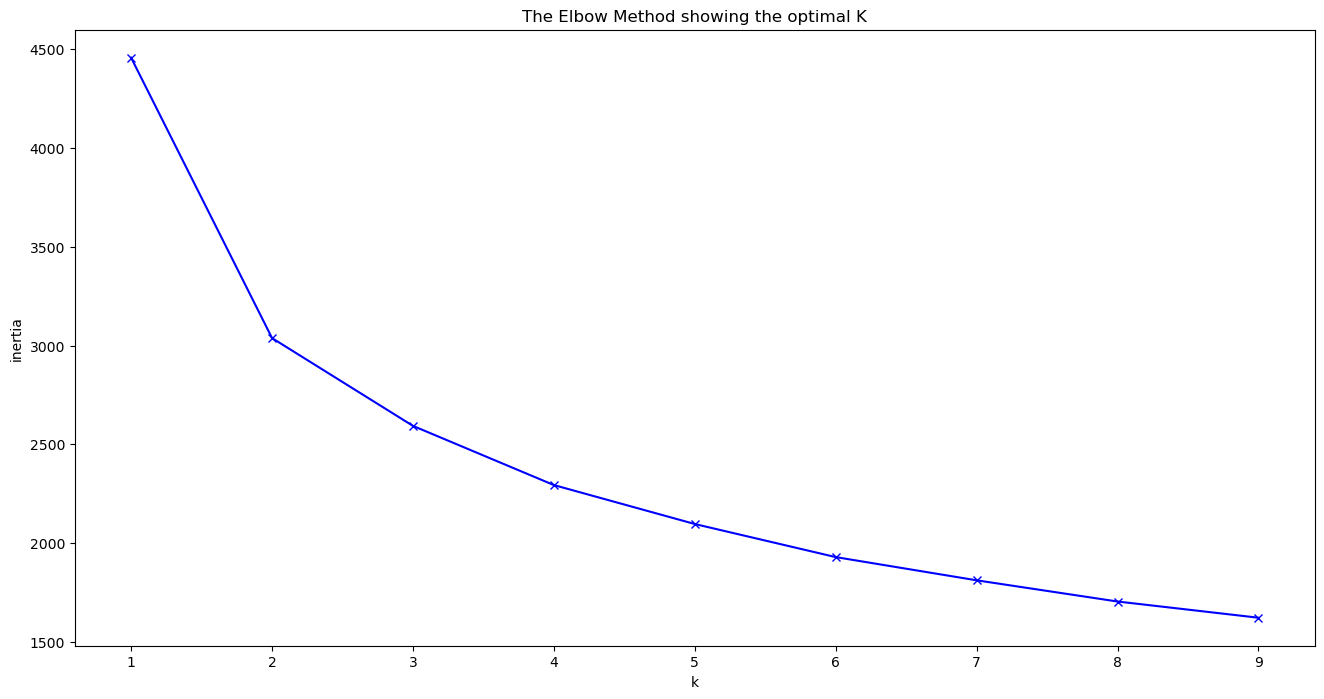

In [189]:
# elbow method 
inertias = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(log_df1)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [221]:
# Silhouette coefficient

from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(log_df1)
    label=kmeanModel.predict(log_df1)
    silhouettes.append(silhouette_score(log_df1,label))

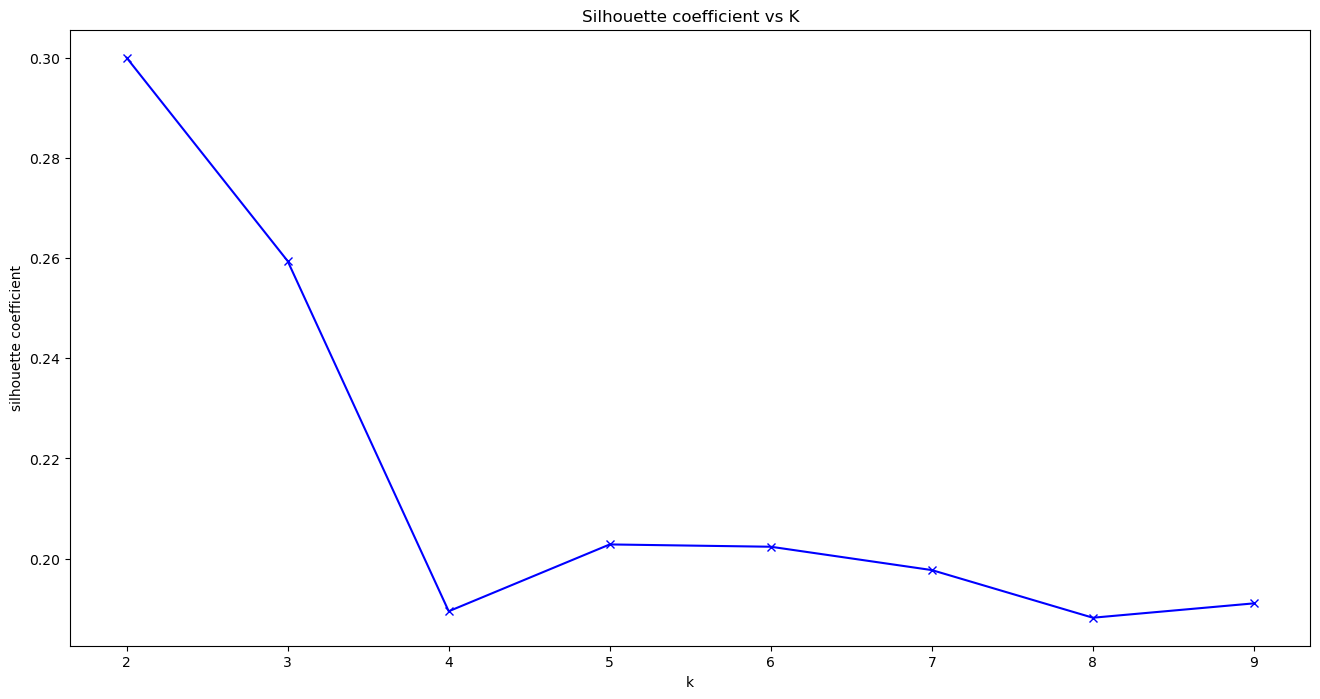

In [30]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [31]:
# From both graphs above, we can identify 2 clusters has the best score.

In [192]:
#finish off example by actually performing clustering
model = KMeans(n_clusters=2)
model.fit(log_df)

# make predictions
y_pred = model.predict(log_df1)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

[Text(0.5, 1.0, 'T-SNE projection')]

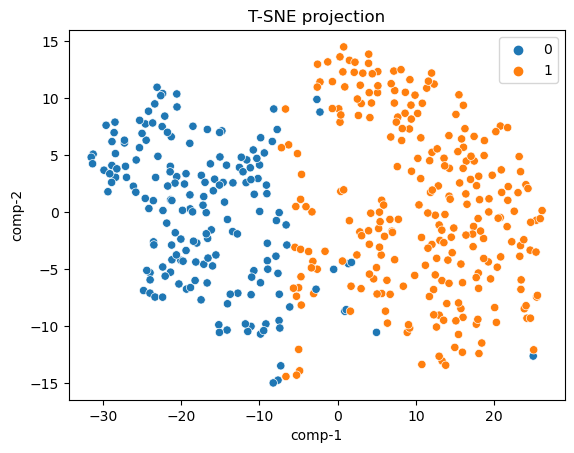

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
z = tsne.fit_transform(log_df1)  # set your dataframe here

temp_df = pd.DataFrame({
    "comp-1": z[:, 0],
    "comp-2": z[:, 1]
})

sns.scatterplot(x="comp-1", y="comp-2", hue=y_pred,  # KMeans predictions
                data=temp_df).set(title="T-SNE projection")

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [196]:
log_df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
430,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
431,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
432,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
433,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [224]:
# Find the best number of clusters from average method

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouettes = []
K = range(2,6) #run K-means with K ranging from 2 to 10
for k in K:
    model = AgglomerativeClustering(n_clusters=k, linkage='average')
    pred = model.fit_predict(log_df1)
    label= model.labels_
    silhouettes.append(silhouette_score(log_df1,label))


In [223]:
print(silhouettes)

[0.5670974014568412, 0.40346594168363664, 0.3316824511025098, 0.2487943987069014]


In [ ]:
#  2 clusters has the best score

In [225]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score


# Perform hierarchical clustering using 2 clusters


# complete
complete = AgglomerativeClustering(n_clusters=2, linkage = 'complete')
complete_pred = complete.fit_predict(log_df1)

# average
average = AgglomerativeClustering(n_clusters=2,linkage = 'average')
average_pred = average.fit_predict(log_df1)

# single
single = AgglomerativeClustering(n_clusters=2,linkage = 'single')
single_pred = single.fit_predict(log_df1)

# use the silhouette score instead to judge clustering
single_silhouette = silhouette_score(log_df1,  single_pred)
complete_silhouette = silhouette_score(log_df1, complete_pred)
avg_silhouette = silhouette_score(log_df1,  average_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.5670974014568412 
Complete:  0.25493881675863467 
Average:  0.5670974014568412


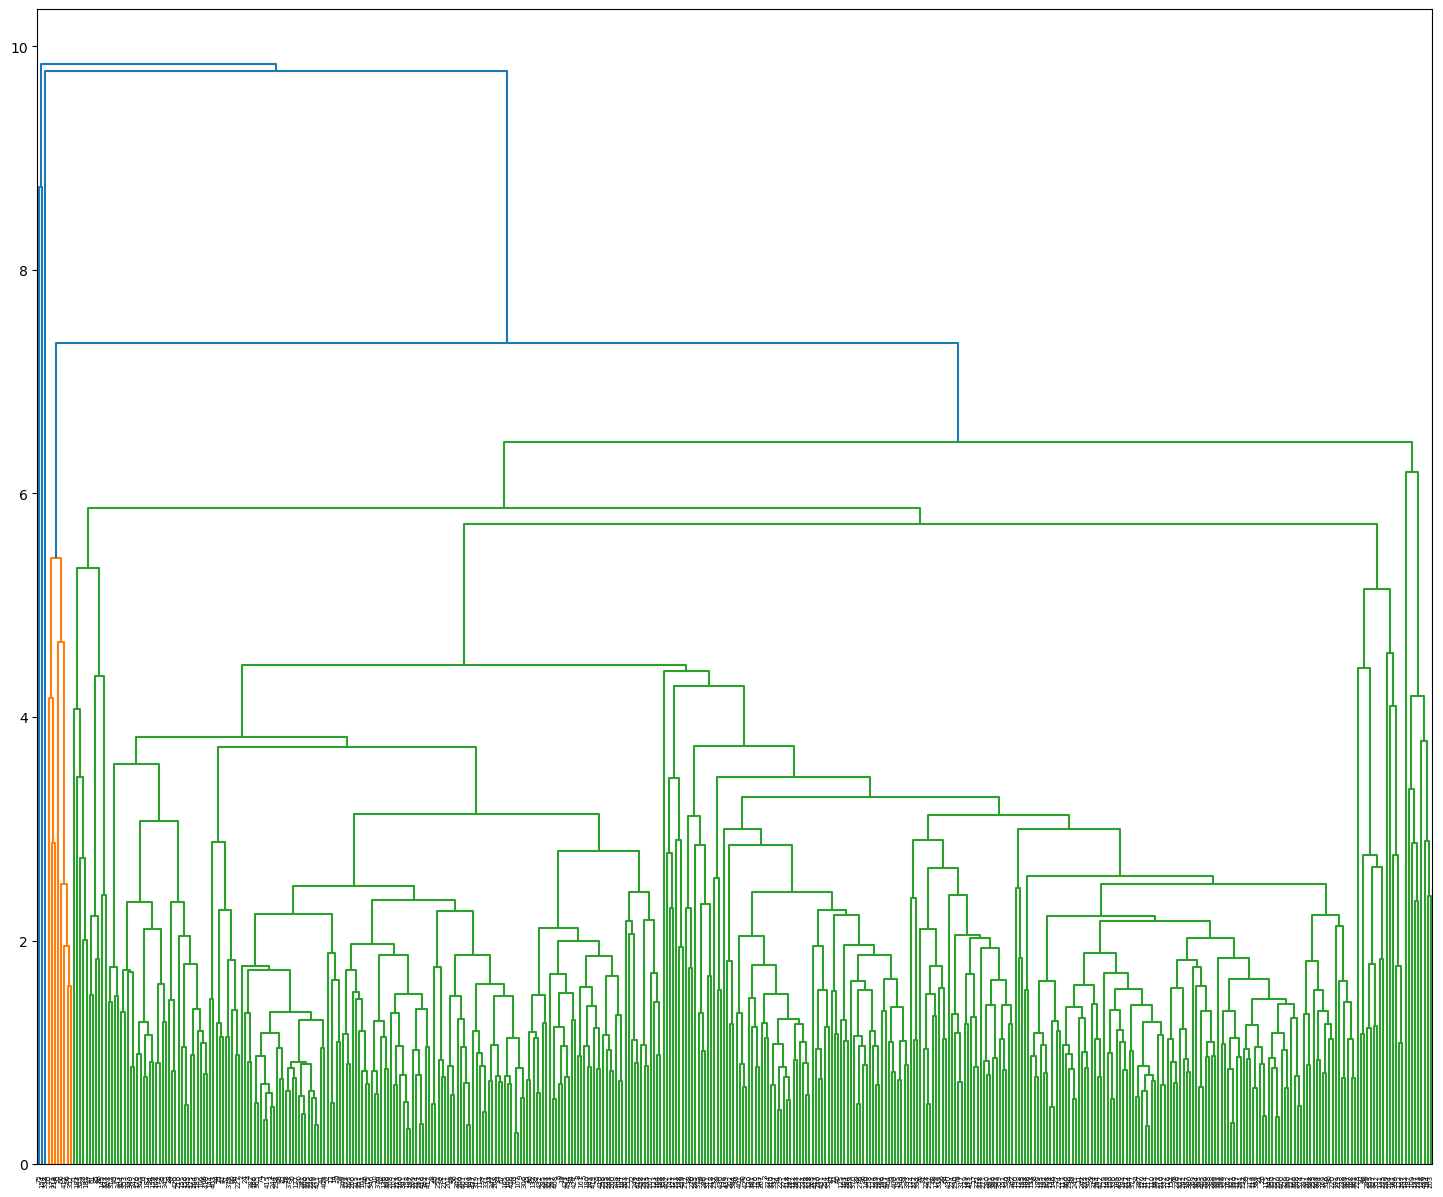

In [199]:
# Pick average or single linkage type that resulted in the highest silhouette score from above

linkage_type = 'average'

linkage_matrix = linkage(log_df, linkage_type)

# plot using 'dendrogram()'

plt.figure(figsize=(18,15))
dendrogram(linkage_matrix) 

plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

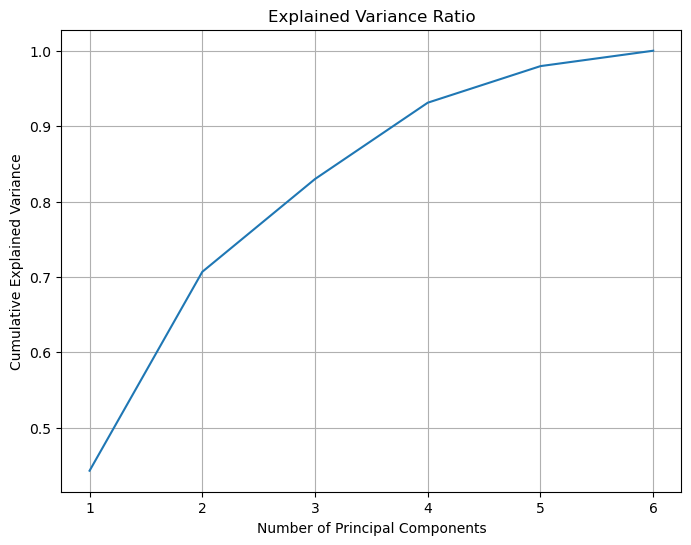

In [230]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components = 6)
log_df_pca = pca.fit(log_df1)

# Get the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_var_ratio) + 1), np.cumsum(explained_var_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [231]:
print(pca.explained_variance_ratio_)

[0.44302505 0.26379218 0.1230638  0.10120908 0.04850196 0.02040793]


In [ ]:
# We choose 4 components that explained_variance_ratio greater than 10%

In [233]:
# set n-component = 4

pca = PCA(n_components=4)
principal_components = pca.fit_transform(log_df1)

principal_df = pd.DataFrame(data=principal_components, 
             columns=['principal component 1', 'principal component 2','principal component 3', 'principal component 4']) 

final_df = principal_df

final_df   

,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.757983,0.009711,-0.959029,-1.682450
1,-1.788665,-0.812251,0.231474,-0.003631
2,-1.883353,-1.599135,1.320393,-0.543246
3,1.155265,-1.405201,0.542235,0.412669
4,-0.784786,-2.394294,0.479768,-0.348316
...,...,...,...,...
430,0.644850,-2.858285,0.637678,0.587900
431,3.184831,-1.944772,0.267656,-0.679896
432,-3.742535,-0.856146,-0.988483,-0.887897
433,1.669147,-0.397968,0.516105,-1.318861


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
After exploaring data by using PCA, Hierarchical Clusting, and K-Means for clustering. We can get findings as below:
    
1. PCA: the data dimention can be reduced to 4,The first principal component explains approximately 44.3% of the variance, followed by the second component with 26.4%, the third component with 12.3%,
        and the fourth component with 10.1%. These components capture the most significant patterns or trends in the data.
2. Hierarchical Clusting: the results of hierarchical clustering indicate that using 2 clusters is the best option and the single and average linkage methods achieved higher silhouette scores.
3. Kmean Clustering :the best-performing clustering result is obtained with 2 clusters, supports the effectiveness of a 2-cluster solution.
